In [2]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import io
import requests
from datetime import date

#change date format
def to_ymd (date):
    return '-'.join([x if (len(x)>1) else '0' + x for x in date.split('/')][::-1])

In [3]:
#Download and save
##THEY KEEP CHANGING THE FORMAT OF THE FUCKING FILE!!!!!!

url = 'https://covid19.isciii.es/resources/serie_historica_acumulados.csv'
dataEsp = pd.read_csv(url, encoding = 'latin1')
dataEsp = dataEsp.fillna(0)
dataEsp = dataEsp[:-3]
dataEsp['Fecha'] = dataEsp['FECHA'].apply(to_ymd)
dataEsp.to_csv('datosciii/covid_ciii' + str(date.today()), encoding = 'latin1')

#Group by CCAA and date
dataEsp=dataEsp.pivot_table(index='CCAA', columns='Fecha', values=['CASOS','Fallecidos','Hospitalizados','UCI'])
dataEsp.columns = dataEsp.columns.swaplevel(0,1)
dataEsp.sort_index(axis=1, level=0, inplace=True)

dates = list(dict.fromkeys(dataEsp.columns.get_level_values(0)))

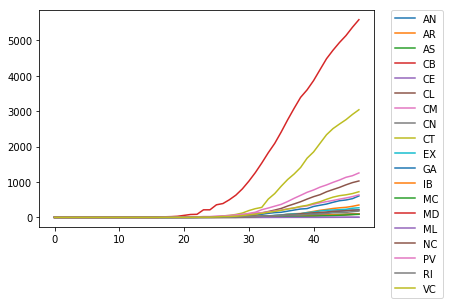

In [10]:
#tests
def plotV (var):
    if var in ['Casos ', 'Fallecidos', 'UCI', 'Hospitalizados']:
        for ccaa in dataEsp.index:
            plt.plot(dates,[dataEsp[d,var][ccaa] for d in dates], label = ccaa)
        plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left', borderaxespad=0.)
        plt.xticks([dates[i] for i in range(len(dates)) if i%2==0], rotation = 'vertical')
        plt.title(var)
        plt.show()
        
for ccaa in dataEsp.index:
    plt.plot([dataEsp[d,'Fallecidos'][ccaa] for d in dates], label=ccaa)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

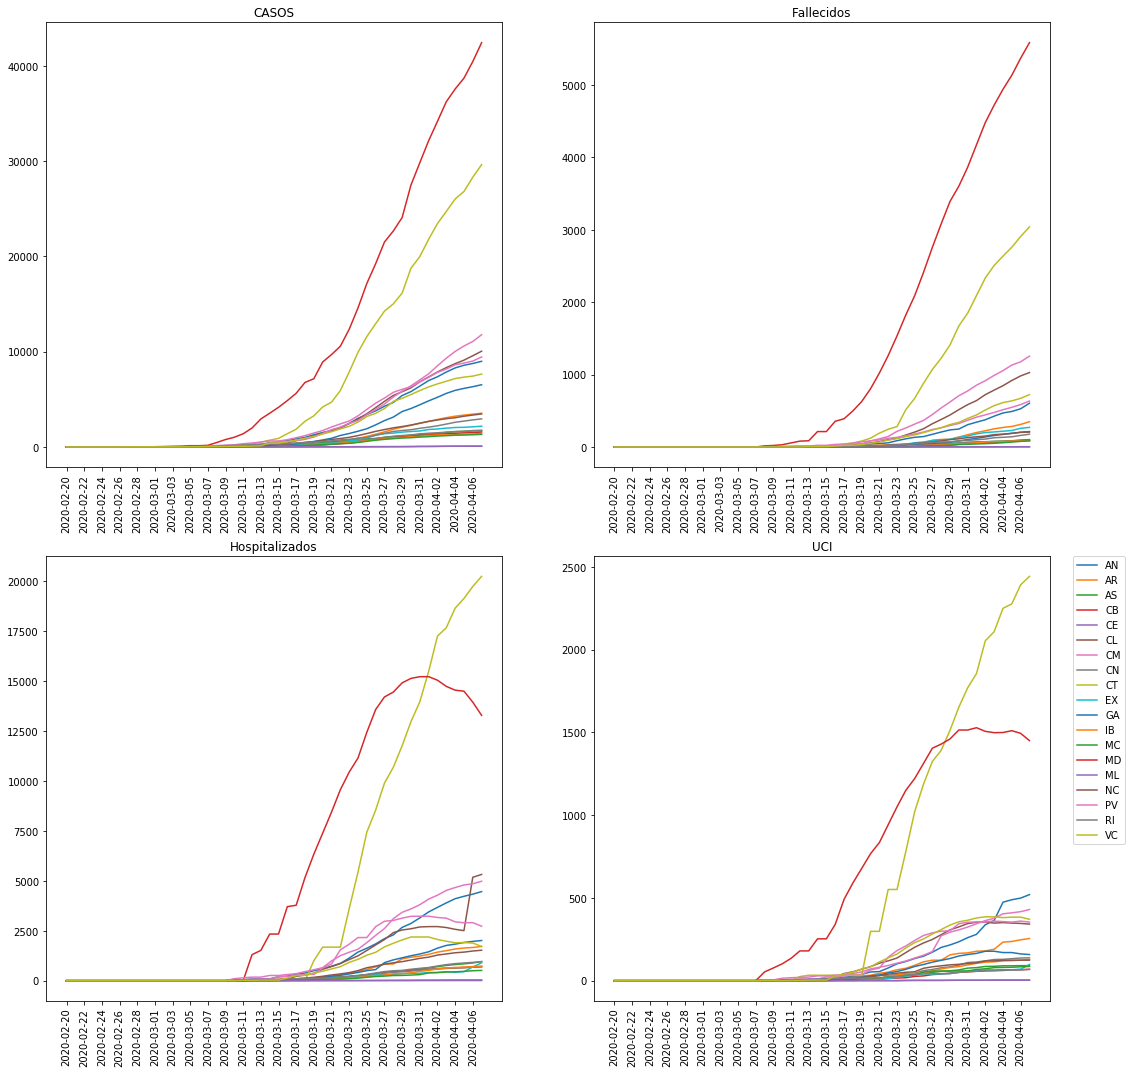

In [11]:
plt.figure(figsize=(18,18))
for i in range(4):
    var = dataEsp.columns[i][1]
    plt.subplot(2, 2, i+1)
    for ccaa in dataEsp.index:
        plt.plot(dates,[dataEsp[d,var][ccaa] for d in dates], label = ccaa)
    plt.xticks([dates[i] for i in range(len(dates)) if i%2==0], rotation = 'vertical')
    plt.title(var)
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('plots_byccaa/allccaa'+str(date.today()))
plt.show()

In [5]:
dataEsp

,CCAA,FECHA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados
0,AN,20/2/2020,0.0,0.0,0.0,0.0,0.0
1,AR,20/2/2020,0.0,0.0,0.0,0.0,0.0
2,AS,20/2/2020,0.0,0.0,0.0,0.0,0.0
3,IB,20/2/2020,1.0,0.0,0.0,0.0,0.0
4,CN,20/2/2020,1.0,0.0,0.0,0.0,0.0
5,CB,20/2/2020,0.0,0.0,0.0,0.0,0.0
6,CM,20/2/2020,0.0,0.0,0.0,0.0,0.0
7,CL,20/2/2020,0.0,0.0,0.0,0.0,0.0
8,CT,20/2/2020,0.0,0.0,0.0,0.0,0.0
9,CE,20/2/2020,0.0,0.0,0.0,0.0,0.0
